In [1]:
#Title: Predictive Maintenance for Industrial Equipment Using Machine Learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Dataset - Sheet1.csv')

In [3]:
data

,Temperature,Pressure,Vibration,Humidity,Failure
0,23.75594,111.47800,0.590529,42.99730,0
1,18.38782,108.31190,0.561806,26.16201,0
2,25.86647,86.78422,0.434486,40.09598,0
3,21.07013,104.74830,0.602397,38.64469,0
4,22.74969,95.66371,0.553688,42.28409,0
...,...,...,...,...,...
8732,21.98014,111.96370,0.505857,66.63030,0
8733,28.56523,106.07030,0.379595,57.72110,0
8734,26.39877,90.06860,0.602586,51.97461,0
8735,34.30743,104.64770,0.430827,60.13049,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8736 non-null   float64
 1   Pressure     8735 non-null   float64
 2   Vibration    8736 non-null   float64
 3   Humidity     8737 non-null   float64
 4   Failure      8737 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 341.4 KB


In [5]:
data.isnull().sum()

Temperature    1
Pressure       2
Vibration      1
Humidity       0
Failure        0
dtype: int64

In [6]:
data = data.drop_duplicates()

In [7]:
data

,Temperature,Pressure,Vibration,Humidity,Failure
0,23.75594,111.47800,0.590529,42.99730,0
1,18.38782,108.31190,0.561806,26.16201,0
2,25.86647,86.78422,0.434486,40.09598,0
3,21.07013,104.74830,0.602397,38.64469,0
4,22.74969,95.66371,0.553688,42.28409,0
...,...,...,...,...,...
8732,21.98014,111.96370,0.505857,66.63030,0
8733,28.56523,106.07030,0.379595,57.72110,0
8734,26.39877,90.06860,0.602586,51.97461,0
8735,34.30743,104.64770,0.430827,60.13049,0


In [8]:
data = data.fillna(data.mean())  #Null values replaced by mean

In [9]:
data.isnull().sum()

Temperature    0
Pressure       0
Vibration      0
Humidity       0
Failure        0
dtype: int64

In [10]:
import pandas as pd
from scipy.stats import zscore
data_standardized = data.apply(zscore)

In [11]:
data_standardized    # for data standardisation of data zscore applied

,Temperature,Pressure,Vibration,Humidity,Failure
0,-0.241262,1.142597,0.923072,-0.690062,-0.226401
1,-1.316431,0.828578,0.634674,-2.360345,-0.226401
2,0.181451,-1.306573,-0.643702,-0.977911,-0.226401
3,-0.779197,0.475135,1.042234,-1.121898,-0.226401
4,-0.442801,-0.425890,0.553164,-0.760822,-0.226401
...,...,...,...,...,...
8732,-0.596933,1.190770,0.072910,1.654642,-0.226401
8733,0.721980,0.606253,-1.194843,0.770732,-0.226401
8734,0.288065,-0.980823,1.044132,0.200605,-0.226401
8735,1.872072,0.465157,-0.680441,1.009776,-0.226401


In [12]:
data_standardized.columns

Index(['Temperature', 'Pressure', 'Vibration', 'Humidity', 'Failure'], dtype='object')

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
#Correlation Analysis (Numeric-Numeric)
data_standardized.corr()

,Temperature,Pressure,Vibration,Humidity,Failure
Temperature,1.000000,-0.003997,-0.003345,0.018575,-0.005177
Pressure,-0.003997,1.000000,-0.011699,-0.003345,-0.010030
Vibration,-0.003345,-0.011699,1.000000,-0.011047,-0.006912
Humidity,0.018575,-0.003345,-0.011047,1.000000,-0.004122
Failure,-0.005177,-0.010030,-0.006912,-0.004122,1.000000


In [15]:
X = data_standardized.drop("Failure", axis = 1).values

In [16]:
X

array([[-0.2412619 ,  1.14259744,  0.92307166, -0.6900623 ],
       [-1.31643057,  0.82857835,  0.63467401, -2.36034454],
       [ 0.1814514 , -1.30657295, -0.64370183, -0.97791141],
       ...,
       [ 0.28806457, -0.98082265,  1.04413181,  0.20060496],
       [ 1.87207228,  0.46515686, -0.68044058,  1.00977555],
       [-0.67972183, -0.21338661, -0.58807662, -2.0608984 ]])

In [17]:
y = data_standardized['Failure'].values

In [18]:
y

array([-0.2264009, -0.2264009, -0.2264009, ..., -0.2264009, -0.2264009,
       -0.2264009])

In [19]:
data_standardized

,Temperature,Pressure,Vibration,Humidity,Failure
0,-0.241262,1.142597,0.923072,-0.690062,-0.226401
1,-1.316431,0.828578,0.634674,-2.360345,-0.226401
2,0.181451,-1.306573,-0.643702,-0.977911,-0.226401
3,-0.779197,0.475135,1.042234,-1.121898,-0.226401
4,-0.442801,-0.425890,0.553164,-0.760822,-0.226401
...,...,...,...,...,...
8732,-0.596933,1.190770,0.072910,1.654642,-0.226401
8733,0.721980,0.606253,-1.194843,0.770732,-0.226401
8734,0.288065,-0.980823,1.044132,0.200605,-0.226401
8735,1.872072,0.465157,-0.680441,1.009776,-0.226401


[]

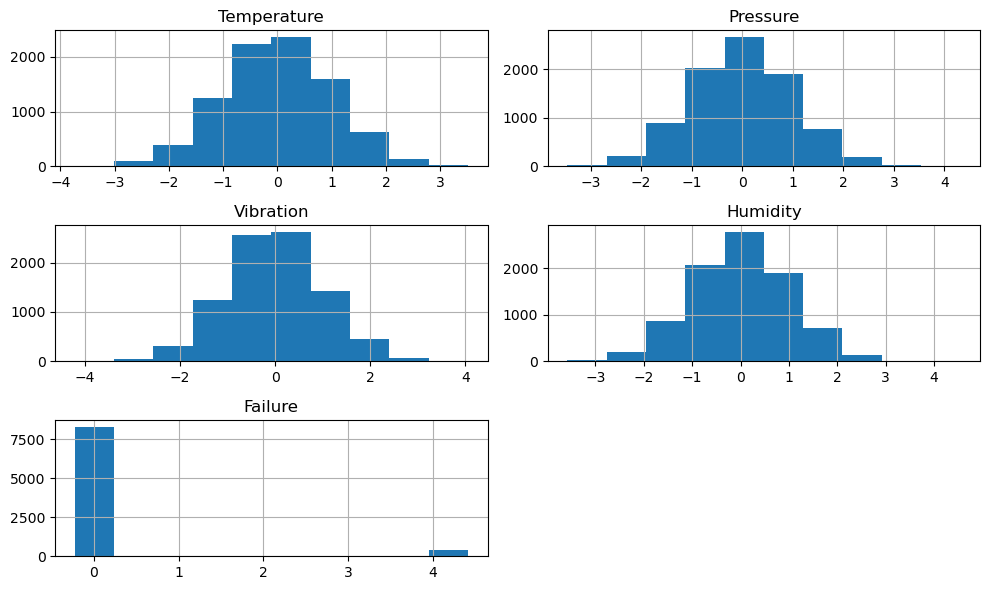

In [20]:
#for checking distribution of data
data_standardized.hist(figsize = (10,6))
plt.tight_layout()
plt.plot()

In [21]:
#outlier detection
import seaborn as sns

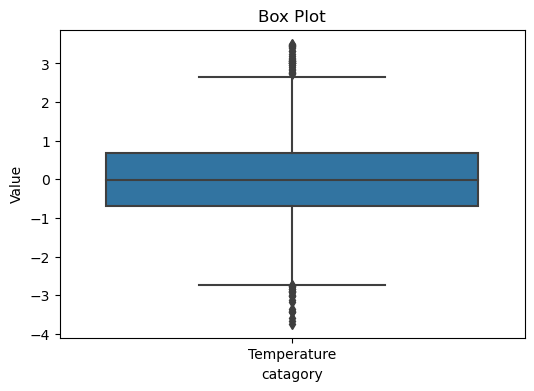

In [22]:
column_name = ['Temperature']
plt.figure(figsize = (6,4))
sns.boxplot(data = data_standardized[column_name])
plt.xlabel('catagory')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

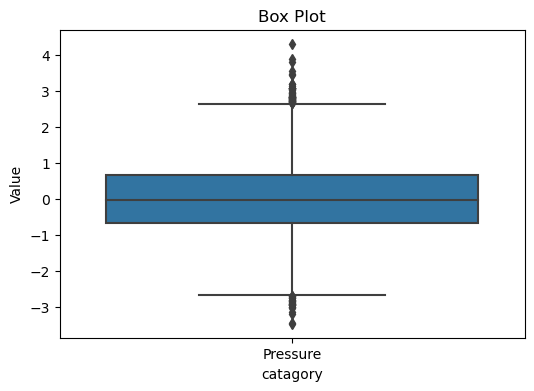

In [23]:
column_name = ['Pressure']
plt.figure(figsize = (6,4))
sns.boxplot(data = data_standardized[column_name])
plt.xlabel('catagory')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

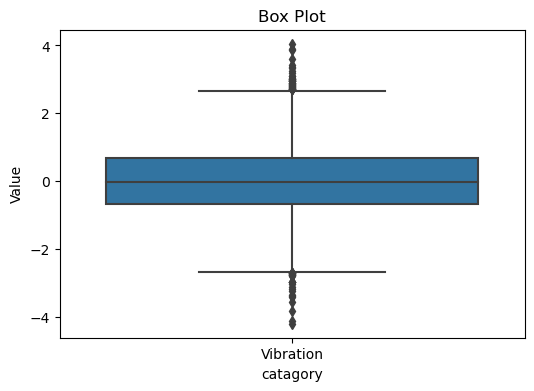

In [24]:
column_name = ['Vibration']
plt.figure(figsize = (6,4))
sns.boxplot(data = data_standardized[column_name])
plt.xlabel('catagory')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

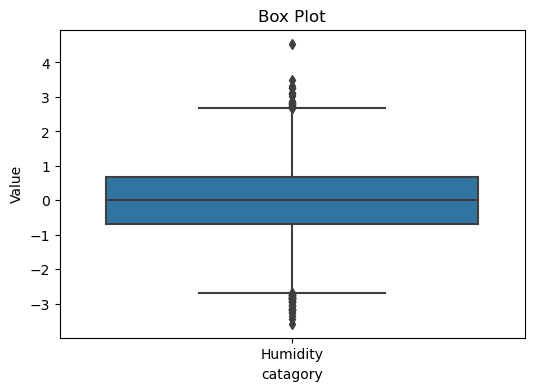

In [25]:
column_name = ['Humidity']
plt.figure(figsize = (6,4))
sns.boxplot(data = data_standardized[column_name])
plt.xlabel('catagory')
plt.ylabel('Value')
plt.title('Box Plot')
plt.show()

In [26]:
# Random Forest, Gradient Boosting, Support Vector Machines, etc.

In [27]:
#Random Forest

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [85]:
X_train.shape

(6989, 4)

In [86]:
X_test.shape

(1748, 4)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9490846681922197


In [ ]:
# Support Vector Machines

In [56]:
y = data['Failure'].values  # checking failure states

In [57]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=50)

In [60]:
x_train.shape

(6989, 4)

In [61]:
x_test.shape

(1748, 4)

In [62]:
from sklearn.svm import SVC

In [63]:
cls = SVC(kernel="rbf")

In [64]:
cls.fit(x_train,y_train)

SVC()

In [65]:
ypred = cls.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(ypred,y_test)

0.9559496567505721

In [68]:
# 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type for hyperparameter tuning

In [69]:
cls = SVC(kernel="linear")

In [70]:
cls.fit(x_train,y_train)

SVC(kernel='linear')

In [71]:
ypred = cls.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(ypred,y_test)

0.9559496567505721

In [74]:
userInput = np.array([[25,100,1.5,45]])

In [75]:
output = cls.predict(userInput)

In [76]:
output

array([0], dtype=int64)

In [105]:
if output[0] == 0:
    print("Failure is not predicted")
else:
    print("Failure is predicted")

Failure is not predicted


In [78]:
# getting same and maximum accuracy by using linear and rbf kernal

In [80]:
# Gradient Boosting

In [81]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.948512585812357


In [ ]:
# Experiment with ensemble techniques to improve model performance.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Bagging (Random Forest)
bagging_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Boosting (Gradient Boosting)
boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Stacking (Voting Classifier)
estimators = [('random_forest', rf_classifier), ('gradient_boosting', gb_classifier), ('logistic_regression', lr_classifier)]
stacking_classifier = VotingClassifier(estimators)

# Train individual classifiers
rf_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Train ensemble classifiers
bagging_classifier.fit(X_train, y_train)
boosting_classifier.fit(X_train, y_train)
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)
y_pred_lr = lr_classifier.predict(X_test)
y_pred_bagging = bagging_classifier.predict(X_test)
y_pred_boosting = boosting_classifier.predict(X_test)
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate individual classifiers
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Evaluate ensemble classifiers
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print("Individual Classifier Accuracies:")
print("Random Forest:", accuracy_rf)
print("Gradient Boosting:", accuracy_gb)
print("Logistic Regression:", accuracy_lr)

print("\nEnsemble Classifier Accuracies:")
print("Bagging (Random Forest):", accuracy_bagging)
print("Boosting (Gradient Boosting):", accuracy_boosting)
print("Stacking (Voting Classifier):", accuracy_stacking)


Individual Classifier Accuracies:
Random Forest: 1.0
Gradient Boosting: 1.0
Logistic Regression: 1.0

Ensemble Classifier Accuracies:
Bagging (Random Forest): 1.0
Boosting (Gradient Boosting): 1.0
Stacking (Voting Classifier): 1.0


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual regressors
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lr_regressor = LinearRegression()

# Train individual regressors
rf_regressor.fit(X_train, y_train)
gb_regressor.fit(X_train, y_train)
lr_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)
y_pred_gb = gb_regressor.predict(X_test)
y_pred_lr = lr_regressor.predict(X_test)

# Calculate RMSE and MAE for each regressor
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Random Forest Regressor:")
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("\nGradient Boosting Regressor:")
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)
print("\nLinear Regression:")
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)


Random Forest Regressor:
RMSE: 0.037193189340702336
MAE: 0.01366666666666667

Gradient Boosting Regressor:
RMSE: 0.06593367853774076
MAE: 0.03101948917402032

Linear Regression:
RMSE: 0.1926494080135646
MAE: 0.1463769496530853


In [ ]:
 # Compare the performance of different models and identify the best-performing one.

In [102]:
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
#X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifiers
rf_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)
y_pred_lr = lr_classifier.predict(X_test)

# Calculate accuracy for each classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Accuracy Scores:")
print("Random Forest:", accuracy_rf)
print("Gradient Boosting:", accuracy_gb)
print("Logistic Regression:", accuracy_lr)

# Identify the best-performing model
best_model = max(accuracy_rf, accuracy_gb, accuracy_lr)
if best_model == accuracy_rf:
    print("Best Performing Model: Random Forest")
elif best_model == accuracy_gb:
    print("Best Performing Model: Gradient Boosting")
else:
    print("Best Performing Model: Logistic Regression")


Accuracy Scores:
Random Forest: 1.0
Gradient Boosting: 1.0
Logistic Regression: 1.0
Best Performing Model: Random Forest


In [ ]:
# Perform cross-validation to assess the model's generalization ability.

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize the classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC()
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# cross-validation with 5 folds
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5)
cv_scores_svm = cross_val_score(svm_classifier, X, y, cv=5)
cv_scores_gb = cross_val_score(gb_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores for Random Forest Classifier:", cv_scores_rf)
print("Mean Cross-Validation Score for Random Forest Classifier:", cv_scores_rf.mean())
print("\nCross-Validation Scores for Support Vector Machine (SVM):", cv_scores_svm)
print("Mean Cross-Validation Score for Support Vector Machine (SVM):", cv_scores_svm.mean())
print("\nCross-Validation Scores for Gradient Boosting Classifier:", cv_scores_gb)
print("Mean Cross-Validation Score for Gradient Boosting Classifier:", cv_scores_gb.mean())


Cross-Validation Scores for Random Forest Classifier: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Score for Random Forest Classifier: 0.9666666666666668

Cross-Validation Scores for Support Vector Machine (SVM): [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean Cross-Validation Score for Support Vector Machine (SVM): 0.9666666666666666

Cross-Validation Scores for Gradient Boosting Classifier: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean Cross-Validation Score for Gradient Boosting Classifier: 0.9600000000000002


In [ ]:
# Cross Validation is performed